Team ID	        :PNT2022TMID42258
Project Name	:Project – REAL TIME COMMUNICATION POWERED BY AI FOR SPECIALLY ABLED

Image preprocessing

In [1]:
pip install keras==2.10.0

Note: you may need to restart the kernel to use updated packages.


Import ImageDataGenerator Library And Configure It

In [2]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [3]:
import tensorflow as tf
def get_data(arg1, **kwargs):
  tf.keras.preprocessing.image_dataset_from_directory(
   r'C:\Users\pragadeswar\Downloads\conversation engine for deaf and dumb.zip',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs
)

In [4]:
def get_data(path):
  tf.keras.preprocessing.image.load_img(
    path, grayscale=False, color_mode="rgb", target_size=None, interpolation="nearest"
)

In [5]:
def get_data(image_path):
  image = tf.keras.preprocessing.image.load_img(image_path)
  input_arr = tf.keras.preprocessing.image.img_to_array(image)
  input_arr = np.array([input_arr])  # Convert single image to a batch.
  predictions = model.predict(input_arr)

In [6]:
def get_data(img):
  tf.keras.preprocessing.image.img_to_array(img, data_format=None, dtype=None)

In [7]:
from tensorflow.python.keras.utils.np_utils import to_categorical
import numpy as np
from PIL import Image
img_data = np.random.random(size=(100, 100, 3))
img = tf.keras.preprocessing.image.array_to_img(img_data)
array = tf.keras.preprocessing.image.img_to_array(img)

Apply ImageDataGenerator Functionality To Train And Test Set

In [8]:
x_train = train_datagen.flow_from_directory(r"C:\Users\pragadeswar\Downloads\conversation engine for deaf and dumb\Dataset\training_set", target_size = (64, 64), batch_size = 300, class_mode = 'categorical', color_mode = 'grayscale')

Found 15750 images belonging to 9 classes.


Team ID	        :PNT2022TMID42258
Project Name	:Project – REAL TIME COMMUNICATION POWERED BY AI FOR SPECIALLY ABLED

Model Building

Import The Required Model Building Libraries

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

Initialize The Model

In [10]:
model = Sequential()

Add The Convolution Layer

In [11]:
model.add(Convolution2D(32, (3, 3), input_shape = (64, 64, 1), activation = 'relu'))

Add The Pooling Layer

In [12]:
model.add(MaxPooling2D(pool_size = (2,2)))

Add The Flatten Layer

In [13]:
model.add(Flatten())

In [14]:
x_test = test_datagen.flow_from_directory(r'C:\Users\pragadeswar\Downloads\conversation engine for deaf and dumb\Dataset\test_set', target_size = (64, 64), batch_size = 300, class_mode = 'categorical', color_mode = 'grayscale')

Found 2250 images belonging to 9 classes.


Adding The Dense Layers

In [15]:
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 9, activation = 'softmax'))

Compile The Model

In [16]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Fit And Save The Model

In [17]:
model.fit_generator(x_train, steps_per_epoch = 24, epochs = 10, validation_data = x_test, validation_steps = 40)

C:\Users\pragadeswar\AppData\Local\Temp\ipykernel_16564\4269064847.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train, steps_per_epoch = 24, epochs = 10, validation_data = x_test, validation_steps = 40)


Epoch 1/10
24/24 [==============================] - 91s 4s/step - loss: 1.0149 - accuracy: 0.6939 - val_loss: 0.4040 - val_accuracy: 0.8791
Epoch 2/10
24/24 [==============================] - 42s 2s/step - loss: 0.2250 - accuracy: 0.9357
Epoch 3/10
24/24 [==============================] - 26s 1s/step - loss: 0.1242 - accuracy: 0.9657
Epoch 4/10
24/24 [==============================] - 20s 837ms/step - loss: 0.0739 - accuracy: 0.9812
Epoch 5/10
24/24 [==============================] - 15s 595ms/step - loss: 0.0490 - accuracy: 0.9872
Epoch 6/10
24/24 [==============================] - 12s 509ms/step - loss: 0.0396 - accuracy: 0.9906
Epoch 7/10
24/24 [==============================] - 10s 432ms/step - loss: 0.0301 - accuracy: 0.9933
Epoch 8/10
24/24 [==============================] - 10s 423ms/step - loss: 0.0221 - accuracy: 0.9955
Epoch 9/10
24/24 [==============================] - 10s 390ms/step - loss: 0.0214 - accuracy: 0.9940
Epoch 10/10
24/24 [==============================] - 10s 3

In [18]:
model.save('aslpng1.h5')

Test The Model

Import The Packages And Load The Saved Model

In [19]:
from keras.models import load_model
import numpy as np
import cv2

In [20]:
model = load_model('aslpng1.h5')

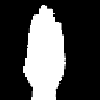

In [21]:
from tensorflow.keras.preprocessing import image
img = image.load_img(r"C:\Users\pragadeswar\Downloads\conversation engine for deaf and dumb\Dataset\test_set\B\46.png",target_size = (100,100))
img

Load The Test Image, Pre-Process It And Predict

In [22]:
from skimage.transform import resize
def detect(frame):
  img=image.img_to_array(frame)
  img = resize(frame, (64,64,1))
  img = np.expand_dims(img, axis = 0)
  pred=np.argmax(model.predict(img))
  op=['A','B','C','D','E','F','G','H','I']
  print('The predicted letter is',op[pred])
  

In [23]:
import sys
sys.setrecursionlimit(1500)

In [24]:
frame = cv2.imread(r'C:\Users\pragadeswar\Downloads\conversation engine for deaf and dumb\Dataset\test_set\G\1.png')
data = detect(frame)

1/1 [==============================] - 0s 169ms/step
The predicted letter is G
